<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/An%C3%A1lise_de_Dados_em_Python_Aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados de reembolso dos senadores - 2020

https://www12.senado.leg.br/dados-abertos

https://www12.senado.leg.br/dados-abertos/conjuntos?grupo=senadores&portal=administrativo



In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('http://www.senado.gov.br/transparencia/LAI/verba/2020.csv', 
                 sep=';', 
                 encoding='latin1',
                 skiprows=1,
                 decimal=',')
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,14764742,06/01/2020,Despesa com energia elétrica para uso do escri...,122.62,2141820
1,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,14764741,06/01/2020,Despesa com energia elétrica para uso do escri...,137.75,2141818
2,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",062.135.728-64,FERNANDO WALDEIR PACINI e ANA LUCIA DA SILVA S...,001/2020,06/01/2020,Despesa com pagamento de aluguel de imóvel par...,1000.00,2139025
3,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/20,02/01/2020,Despesa com pagamento de aluguel de imóvel par...,6000.00,2139020
4,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,333871612,25/12/2019,Despesa com pagamento de telefone para uso do ...,323.95,2139044


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13708 entries, 0 to 13707
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                13708 non-null  int64  
 1   MES                13708 non-null  int64  
 2   SENADOR            13708 non-null  object 
 3   TIPO_DESPESA       13708 non-null  object 
 4   CNPJ_CPF           13708 non-null  object 
 5   FORNECEDOR         13708 non-null  object 
 6   DOCUMENTO          13103 non-null  object 
 7   DATA               13708 non-null  object 
 8   DETALHAMENTO       6911 non-null   object 
 9   VALOR_REEMBOLSADO  13708 non-null  float64
 10  COD_DOCUMENTO      13708 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


In [10]:
df.describe().round(2)

,ANO,MES,VALOR_REEMBOLSADO,COD_DOCUMENTO
count,13708.0,13708.00,13708.00,13708.00
mean,2020.0,6.31,1404.15,2146790.98
std,0.0,3.60,3127.24,4465.32
min,2020.0,1.00,0.01,2138459.00
25%,2020.0,3.00,150.00,2143048.75
50%,2020.0,6.00,390.86,2146834.50
75%,2020.0,10.00,1469.50,2150629.25
max,2020.0,12.00,120000.00,2155229.00


In [11]:
df['VALOR_REEMBOLSADO'].sum()

19248133.53

In [12]:
df['SENADOR'].value_counts()

CARLOS VIANA           563
MAJOR OLIMPIO          435
JAQUES WAGNER          423
ZEQUINHA MARINHO       421
PAULO PAIM             384
                      ... 
STYVENSON VALENTIM      19
ALVARO DIAS             15
JADER BARBALHO          14
NEY SUASSUNA             6
ORIOVISTO GUIMARÃES      1
Name: SENADOR, Length: 83, dtype: int64

In [14]:
df.groupby(by='SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

SENADOR
TELMÁRIO MOTA          488459.41
MECIAS DE JESUS        487053.98
ROGÉRIO CARVALHO       486445.41
PAULO ROCHA            471381.94
MARCIO BITTAR          460225.99
                         ...    
LUIZ PASTORE            32179.03
ALVARO DIAS             17371.41
STYVENSON VALENTIM      13804.94
NEY SUASSUNA            12244.49
ORIOVISTO GUIMARÃES      1548.02
Name: VALOR_REEMBOLSADO, Length: 83, dtype: float64

In [16]:
df.nlargest(5, 'VALOR_REEMBOLSADO').T

,12900,11270,9113,11526,4750
ANO,2020,2020,2020,2020,2020
MES,12,12,12,12,12
SENADOR,WELLINGTON FAGUNDES,ROGÉRIO CARVALHO,MECIAS DE JESUS,SÉRGIO PETECÃO,IRAJÁ
TIPO_DESPESA,"Contratação de consultorias, assessorias, pesq...",Divulgação da atividade parlamentar,"Contratação de consultorias, assessorias, pesq...","Contratação de consultorias, assessorias, pesq...","Contratação de consultorias, assessorias, pesq..."
CNPJ_CPF,23.721.017/0001-33,08.380.409/0001-92,84.017.888/0001-65,13.218.533/0001-96,22.635.185/0001-43
FORNECEDOR,"T2 Comunicação, Video e Produções Eireli - EPP",LF Locações de Equipamentos e Filmagens Ltda. ME,FORBRAS RORAIMA LTDA,AC 24 HORAS LTDA,Sobs Planejamento e Publicidade - EIRELI
DOCUMENTO,000.000.765,31,00031218,1114,00000061
DATA,21/12/2020,02/12/2020,04/12/2020,28/12/2020,17/12/2020
DETALHAMENTO,Despesa com serviço de consultoria e assessori...,NaN,NaN,NaN,NaN
VALOR_REEMBOLSADO,120000,72000,49500,45000,43000


In [18]:
df.nsmallest(5, 'VALOR_REEMBOLSADO').T

,2460,2476,2557,1875,13524
ANO,2020,2020,2020,2020,2020
MES,3,3,10,8,8
SENADOR,DÁRIO BERGER,DÁRIO BERGER,DÁRIO BERGER,CIRO NOGUEIRA,ZEQUINHA MARINHO
TIPO_DESPESA,"Passagens aéreas, aquáticas e terrestres nacio...","Passagens aéreas, aquáticas e terrestres nacio...","Passagens aéreas, aquáticas e terrestres nacio...","Locomoção, hospedagem, alimentação, combustíve...","Locomoção, hospedagem, alimentação, combustíve..."
CNPJ_CPF,07.575.651/0001-59,33.937.681/0001-78,33.937.681/0001-78,01.029.371/0001-69,02.019.808/0001-46
FORNECEDOR,GOL LINHAS AÉREAS INTELIGENTES,LATAM,LATAM,Auto Posto Viracopos de Campinas Ltda,AUTO POSTO TIMBOTEUA LTDA.
DOCUMENTO,SR6BNK,XYEDKX,RSGMOE,085756,15126
DATA,23/03/2020,25/03/2020,20/10/2020,04/08/2020,28/08/2020
DETALHAMENTO,"Companhia Aérea: GOL, Localizador: SR6BNK. Pas...","Companhia Aérea: LATAM, Localizador: XYEDKX. P...","Companhia Aérea: LATAM, Localizador: RSGMOE. P...",Combustível,NaN
VALOR_REEMBOLSADO,0.01,0.01,0.01,0.03,0.06


In [19]:
df['TIPO_DESPESA'].value_counts()

Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   4299
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           4034
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 2043
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.     1205
Divulgação da atividade parlamentar                                                                                                                                                                1110


In [20]:
df.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

TIPO_DESPESA
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                             5728006.32
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           3869618.06
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   3546833.16
Divulgação da atividade parlamentar                                                                                                                                                                2627388.15
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                 

# Análise do eleitorado brasileiro

https://www.tse.jus.br/eleicoes/estatisticas/estatisticas-eleitorais

Eleições 2018 -> https://cdn.tse.jus.br/estatistica/sead/eleitorado/eleitorado_municipio_2018.csv

Eleições 2020 -> https://cdn.tse.jus.br/estatistica/sead/eleitorado/eleitorado_municipio_2020.csv

In [21]:
import pandas as pd

In [48]:
df = pd.read_csv('https://cdn.tse.jus.br/estatistica/sead/eleitorado/eleitorado_municipio_2018.csv',
                 sep=';',
                 encoding='latin1')
df.head().T

,0,1,2,3,4
NR_ANO_ELEICAO,2018,2018,2018,2018,2018
CD_PAIS,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,N,N,N,N,N
NM_REGIAO,Norte,Norte,Norte,Norte,Norte
SG_UF,AC,AC,AC,AC,AC
NM_UF,Acre,Acre,Acre,Acre,Acre
CD_MUNICIPIO,1120,1570,1058,1007,1015
NM_MUNICIPIO,ACRELÂNDIA,ASSIS BRASIL,BRASILÉIA,BUJARI,CAPIXABA
QTD_ELEITORES,8809,5726,16041,8683,6832


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5741 entries, 0 to 5740
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   NR_ANO_ELEICAO                   5741 non-null   int64 
 1   CD_PAIS                          5741 non-null   int64 
 2   NM_PAIS                          5741 non-null   object
 3   SG_REGIAO                        5741 non-null   object
 4   NM_REGIAO                        5741 non-null   object
 5   SG_UF                            5741 non-null   object
 6   NM_UF                            5741 non-null   object
 7   CD_MUNICIPIO                     5741 non-null   int64 
 8   NM_MUNICIPIO                     5741 non-null   object
 9   QTD_ELEITORES                    5741 non-null   int64 
 10  QTD_ELEITORES_FEMININO           5741 non-null   int64 
 11  QTD_ELEITORES_MASCULINO          5741 non-null   int64 
 12  QTD_ELEITORES_NAOINFORMADO       5

In [50]:
df.nlargest(5, 'QTD_ELEITORES_DEFICIENTE')

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,QTD_ELEITORES_FEMININO,QTD_ELEITORES_MASCULINO,QTD_ELEITORES_NAOINFORMADO,QTD_ELEITORES_MENOR16,QTD_ELEITORES_16,QTD_ELEITORES_17,QTD_ELEITORES_18,QTD_ELEITORES_19,QTD_ELEITORES_20,QTD_ELEITORES_21A24,QTD_ELEITORES_25A29,QTD_ELEITORES_30A34,QTD_ELEITORES_35A39,QTD_ELEITORES_40A44,QTD_ELEITORES_45A49,QTD_ELEITORES_50A54,QTD_ELEITORES_55A59,QTD_ELEITORES_60A64,QTD_ELEITORES_65A69,QTD_ELEITORES_70A74,QTD_ELEITORES_75A79,QTD_ELEITORES_80A84,QTD_ELEITORES_85A89,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL
5358,2018,1,Brasil,SE,Sudeste,SP,São Paulo,71072,SÃO PAULO,9052724,4880298,4162595,9831,0,8297,33012,112165,150981,165513,695150,851772,949321,1009746,904051,810265,770035,681818,581340,438276,310105,216754,150557,99600,77321,33110,3439,96,0,0,4346933,4705791,138884,551
3660,2018,1,Brasil,SE,Sudeste,RJ,Rio de Janeiro,60011,RIO DE JANEIRO,4891885,2669796,2216926,5163,0,3375,12924,51277,74125,84134,354953,426610,444084,488519,434257,405763,406243,396603,356045,284780,204036,148574,112840,82747,81644,36069,2219,64,0,0,691875,4200010,23228,203
4990,2018,1,Brasil,SE,Sudeste,SP,São Paulo,64777,GUARULHOS,814342,439778,374563,1,0,1464,5595,16434,20556,21905,82067,83577,88977,91908,83734,77979,71406,59686,49362,34511,16506,5951,2005,578,117,13,4,7,0,0,813706,636,22266,82
535,2018,1,Brasil,NE,Nordeste,BA,Bahia,38490,SALVADOR,1827436,1022159,805276,1,0,1827,8991,26040,34122,36043,148382,175583,211822,233774,197952,173908,163238,141334,113029,83872,43131,20619,9172,3453,939,164,34,7,0,0,1826047,1389,19305,122
4010,2018,1,Brasil,S,Sul,RS,Rio Grande do Sul,85995,CAXIAS DO SUL,322901,170288,152613,0,0,457,1432,4389,5644,6066,24578,32996,34856,36640,30006,28245,29027,27562,23344,17309,10526,5524,2765,1151,336,46,2,0,0,0,322336,565,18360,14


In [51]:
print(f'Eleitoras: {df["QTD_ELEITORES_FEMININO"].sum()}')
print(f'Eleitores: {df["QTD_ELEITORES_MASCULINO"].sum()}')
print(f'Não informado: {df["QTD_ELEITORES_NAOINFORMADO"].sum()}')

Eleitoras: 77339897
Eleitores: 69902977
Não informado: 63401


In [52]:
tot_eleitores = df['QTD_ELEITORES'].sum()
tot_fem = df['QTD_ELEITORES_FEMININO'].sum()
tot_mas = df['QTD_ELEITORES_MASCULINO'].sum()
tot_nao = df['QTD_ELEITORES_NAOINFORMADO'].sum()

In [53]:
print(f'Eleitoras: {tot_fem/tot_eleitores*100:.2f}%')
print(f'Eleitores: {tot_mas/tot_eleitores*100:.2f}%')
print(f'Não informado: {tot_nao/tot_eleitores*100:.2f}%')

Eleitoras: 52.50%
Eleitores: 47.45%
Não informado: 0.04%


In [54]:
df[df['QTD_ELEITORES_MASCULINO'] > df['QTD_ELEITORES_FEMININO']]

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,QTD_ELEITORES_FEMININO,QTD_ELEITORES_MASCULINO,QTD_ELEITORES_NAOINFORMADO,QTD_ELEITORES_MENOR16,QTD_ELEITORES_16,QTD_ELEITORES_17,QTD_ELEITORES_18,QTD_ELEITORES_19,QTD_ELEITORES_20,QTD_ELEITORES_21A24,QTD_ELEITORES_25A29,QTD_ELEITORES_30A34,QTD_ELEITORES_35A39,QTD_ELEITORES_40A44,QTD_ELEITORES_45A49,QTD_ELEITORES_50A54,QTD_ELEITORES_55A59,QTD_ELEITORES_60A64,QTD_ELEITORES_65A69,QTD_ELEITORES_70A74,QTD_ELEITORES_75A79,QTD_ELEITORES_80A84,QTD_ELEITORES_85A89,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL
0,2018,1,Brasil,N,Norte,AC,Acre,1120,ACRELÂNDIA,8809,4322,4487,0,0,47,113,229,225,232,890,1033,973,1072,831,732,608,602,419,349,217,126,74,27,8,2,0,0,0,0,8784,25,35,0
3,2018,1,Brasil,N,Norte,AC,Acre,1007,BUJARI,8683,4287,4396,0,0,84,126,204,248,268,925,988,983,1024,895,700,581,471,448,328,190,136,49,22,11,2,0,0,0,0,8665,18,18,0
4,2018,1,Brasil,N,Norte,AC,Acre,1015,CAPIXABA,6832,3324,3508,0,0,75,139,193,240,210,721,757,681,702,654,601,541,429,355,246,139,96,27,20,5,1,0,0,0,0,6820,12,78,0
7,2018,1,Brasil,N,Norte,AC,Acre,1139,FEIJÓ,20565,10088,10476,1,0,238,412,594,669,681,2412,2555,2323,2214,1853,1519,1261,987,777,622,481,393,231,178,99,55,6,5,0,0,9481,11084,74,1
8,2018,1,Brasil,N,Norte,AC,Acre,1104,JORDÃO,4793,2211,2582,0,0,43,82,145,194,209,647,710,556,554,402,334,235,174,153,97,70,60,37,44,23,16,7,1,0,0,2307,2486,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,2018,2,Exterior,E,Exterior,ZZ,Exterior,30538,SEUL,105,48,57,0,0,0,0,1,0,1,5,20,27,16,6,6,9,4,4,4,1,0,1,0,0,0,0,0,0,0,22,83,0,0
5719,2018,2,Exterior,E,Exterior,ZZ,Exterior,30546,SÓFIA,16,3,13,0,0,0,0,0,0,0,1,2,2,0,1,1,3,0,0,2,2,1,0,1,0,0,0,0,0,0,0,16,0,0
5729,2018,2,Exterior,E,Exterior,ZZ,Exterior,30627,TÓQUIO,26092,11908,14184,0,0,1,15,153,290,327,1681,2145,2600,2820,3114,3354,3325,2792,1971,1066,361,61,10,5,1,0,0,0,0,0,561,25531,25,0
5732,2018,2,Exterior,E,Exterior,ZZ,Exterior,30740,VARSÓVIA,188,81,107,0,0,0,0,0,1,0,6,24,30,42,22,27,14,8,3,3,1,2,2,1,1,1,0,0,0,0,28,160,0,0


In [55]:
df['RELACAO_FM'] = df['QTD_ELEITORES_FEMININO'] / df['QTD_ELEITORES_MASCULINO']

In [56]:
df.nlargest(5, 'RELACAO_FM').T

,5581,5613,5652,5658,5653
NR_ANO_ELEICAO,2018,2018,2018,2018,2018
CD_PAIS,2,2,2,2,2
NM_PAIS,Exterior,Exterior,Exterior,Exterior,Exterior
SG_REGIAO,E,E,E,E,E
NM_REGIAO,Exterior,Exterior,Exterior,Exterior,Exterior
SG_UF,ZZ,ZZ,ZZ,ZZ,ZZ
NM_UF,Exterior,Exterior,Exterior,Exterior,Exterior
CD_MUNICIPIO,99350,38920,99422,29963,29939
NM_MUNICIPIO,BAMAKO,COTONOU,LETHEM,LOMÉ,LIBREVILLE
QTD_ELEITORES,1,2,1,3,21


In [57]:
df.nsmallest(5, 'RELACAO_FM').T

,5592,5610,5625,5719,5639
NR_ANO_ELEICAO,2018,2018,2018,2018,2018
CD_PAIS,2,2,2,2,2
NM_PAIS,Exterior,Exterior,Exterior,Exterior,Exterior
SG_REGIAO,E,E,E,E,E
NM_REGIAO,Exterior,Exterior,Exterior,Exterior,Exterior
SG_UF,ZZ,ZZ,ZZ,ZZ,ZZ
NM_UF,Exterior,Exterior,Exterior,Exterior,Exterior
CD_MUNICIPIO,39187,38903,99406,30546,38989
NM_MUNICIPIO,BRAZZAVILLE,CONACRI,FREETOWN,SÓFIA,IEREVAN-ARME
QTD_ELEITORES,3,2,2,16,12


In [60]:
df_Brasil = df[df['CD_PAIS'] == 1].copy()
df_Brasil

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,QTD_ELEITORES_FEMININO,QTD_ELEITORES_MASCULINO,QTD_ELEITORES_NAOINFORMADO,QTD_ELEITORES_MENOR16,QTD_ELEITORES_16,QTD_ELEITORES_17,QTD_ELEITORES_18,QTD_ELEITORES_19,QTD_ELEITORES_20,QTD_ELEITORES_21A24,QTD_ELEITORES_25A29,QTD_ELEITORES_30A34,QTD_ELEITORES_35A39,QTD_ELEITORES_40A44,QTD_ELEITORES_45A49,QTD_ELEITORES_50A54,QTD_ELEITORES_55A59,QTD_ELEITORES_60A64,QTD_ELEITORES_65A69,QTD_ELEITORES_70A74,QTD_ELEITORES_75A79,QTD_ELEITORES_80A84,QTD_ELEITORES_85A89,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL,RELACAO_FM
0,2018,1,Brasil,N,Norte,AC,Acre,1120,ACRELÂNDIA,8809,4322,4487,0,0,47,113,229,225,232,890,1033,973,1072,831,732,608,602,419,349,217,126,74,27,8,2,0,0,0,0,8784,25,35,0,0.963227
1,2018,1,Brasil,N,Norte,AC,Acre,1570,ASSIS BRASIL,5726,2871,2855,0,0,42,73,133,129,163,649,763,704,675,573,434,351,282,239,194,141,87,49,27,14,4,0,0,0,0,5712,14,13,0,1.005604
2,2018,1,Brasil,N,Norte,AC,Acre,1058,BRASILÉIA,16041,8247,7794,0,0,107,249,358,435,424,1654,1976,1759,1830,1568,1411,1216,899,767,591,375,216,127,57,14,4,4,0,0,0,15905,136,92,0,1.058122
3,2018,1,Brasil,N,Norte,AC,Acre,1007,BUJARI,8683,4287,4396,0,0,84,126,204,248,268,925,988,983,1024,895,700,581,471,448,328,190,136,49,22,11,2,0,0,0,0,8665,18,18,0,0.975205
4,2018,1,Brasil,N,Norte,AC,Acre,1015,CAPIXABA,6832,3324,3508,0,0,75,139,193,240,210,721,757,681,702,654,601,541,429,355,246,139,96,27,20,5,1,0,0,0,0,6820,12,78,0,0.947548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,2018,1,Brasil,N,Norte,TO,Tocatins,96199,TOCANTÍNIA,4734,2307,2427,0,0,56,60,124,138,159,614,608,555,495,385,361,290,290,204,165,88,80,25,28,5,1,3,0,0,0,4733,1,20,0,0.950556
5566,2018,1,Brasil,N,Norte,TO,Tocatins,73458,TUPIRAMA,1789,793,996,0,0,18,21,43,41,37,174,205,203,191,182,150,144,101,100,68,47,34,16,10,2,2,0,0,0,0,1789,0,17,0,0.796185
5567,2018,1,Brasil,N,Norte,TO,Tocatins,73237,TUPIRATINS,1790,835,955,0,0,15,14,50,48,39,155,182,186,193,160,151,157,128,109,70,57,39,17,15,4,1,0,0,0,0,1790,0,5,0,0.874346
5568,2018,1,Brasil,N,Norte,TO,Tocatins,96652,WANDERLÂNDIA,6512,3200,3312,0,0,47,67,161,161,171,565,593,671,719,662,548,519,394,403,301,220,147,93,53,13,3,1,0,0,0,6510,2,123,2,0.966184


In [59]:
df_exterior = df[df['CD_PAIS'] != 1].copy()
df_exterior

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,QTD_ELEITORES_FEMININO,QTD_ELEITORES_MASCULINO,QTD_ELEITORES_NAOINFORMADO,QTD_ELEITORES_MENOR16,QTD_ELEITORES_16,QTD_ELEITORES_17,QTD_ELEITORES_18,QTD_ELEITORES_19,QTD_ELEITORES_20,QTD_ELEITORES_21A24,QTD_ELEITORES_25A29,QTD_ELEITORES_30A34,QTD_ELEITORES_35A39,QTD_ELEITORES_40A44,QTD_ELEITORES_45A49,QTD_ELEITORES_50A54,QTD_ELEITORES_55A59,QTD_ELEITORES_60A64,QTD_ELEITORES_65A69,QTD_ELEITORES_70A74,QTD_ELEITORES_75A79,QTD_ELEITORES_80A84,QTD_ELEITORES_85A89,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL,RELACAO_FM
5570,2018,2,Exterior,E,Exterior,ZZ,Exterior,29254,ABIDJÃ,68,40,28,0,0,0,0,0,0,3,2,3,10,12,4,5,6,3,13,2,4,1,0,0,0,0,0,0,0,0,1,67,0,0,1.428571
5571,2018,2,Exterior,E,Exterior,ZZ,Exterior,29262,ABU DHABI,1750,909,841,0,0,1,2,16,12,8,63,156,341,434,319,166,115,76,28,7,4,0,1,1,0,0,0,0,0,0,164,1586,0,0,1.080856
5572,2018,2,Exterior,E,Exterior,ZZ,Exterior,29270,ACCRA-GANA,50,23,27,0,0,0,0,0,0,1,3,3,7,10,10,2,3,4,0,2,3,0,1,1,0,0,0,0,0,0,1,49,0,0,0.851852
5573,2018,2,Exterior,E,Exterior,ZZ,Exterior,29289,AMÃ,793,445,348,0,0,0,1,5,12,11,78,112,120,102,77,77,56,52,29,16,23,13,6,2,1,0,0,0,0,0,18,775,0,0,1.278736
5574,2018,2,Exterior,E,Exterior,ZZ,Exterior,29297,ANCARA,40,29,11,0,0,0,0,0,0,0,4,4,5,2,5,1,7,4,2,3,0,1,1,1,0,0,0,0,0,0,4,36,0,0,2.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,2018,2,Exterior,E,Exterior,ZZ,Exterior,30821,WINDHOEK,51,35,16,0,0,0,0,2,0,0,1,6,5,7,6,6,4,5,6,2,1,0,0,0,0,0,0,0,0,0,4,47,0,0,2.187500
5737,2018,2,Exterior,E,Exterior,ZZ,Exterior,30848,XANGAI,627,266,361,0,0,0,4,8,12,14,55,68,59,90,101,68,51,35,34,16,7,2,2,1,0,0,0,0,0,0,35,592,0,0,0.736842
5738,2018,2,Exterior,E,Exterior,ZZ,Exterior,99376,YANGON,9,6,3,0,0,0,0,0,0,0,0,1,2,3,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,3,6,0,0,2.000000
5739,2018,2,Exterior,E,Exterior,ZZ,Exterior,39020,ZAGREB,56,34,22,0,0,0,0,0,0,0,2,6,9,15,7,1,8,4,1,2,1,0,0,0,0,0,0,0,0,0,9,47,0,0,1.545455


In [61]:
df_Brasil.nlargest(5, 'RELACAO_FM').T

,3653,535,2894,373,329
NR_ANO_ELEICAO,2018,2018,2018,2018,2018
CD_PAIS,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,SE,NE,NE,NE,NE
NM_REGIAO,Sudeste,Nordeste,Nordeste,Nordeste,Nordeste
SG_UF,RJ,BA,PE,BA,BA
NM_UF,Rio de Janeiro,Bahia,Pernambuco,Bahia,Bahia
CD_MUNICIPIO,58122,38490,24910,35939,35157
NM_MUNICIPIO,QUEIMADOS,SALVADOR,OLINDA,IRECÊ,FEIRA DE SANTANA
QTD_ELEITORES,72971,1827436,276081,44082,384050


In [62]:
df_Brasil.nsmallest(5, 'RELACAO_FM').T

,2389,1237,2362,2396,2361
NR_ANO_ELEICAO,2018,2018,2018,2018,2018
CD_PAIS,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,CO,NE,CO,CO,CO
NM_REGIAO,Centro-Oeste,Nordeste,Centro-Oeste,Centro-Oeste,Centro-Oeste
SG_UF,MT,MA,MT,MT,MT
NM_UF,Mato Grosso,Maranhão,Mato Grosso,Mato Grosso,Mato Grosso
CD_MUNICIPIO,90980,7900,90948,90921,90808
NM_MUNICIPIO,SANTA CRUZ DO XINGU,MARAJÁ DO SENA,NOVO SANTO ANTÔNIO,SERRA NOVA DOURADA,NOVO MUNDO
QTD_ELEITORES,1571,6416,1701,1379,5064


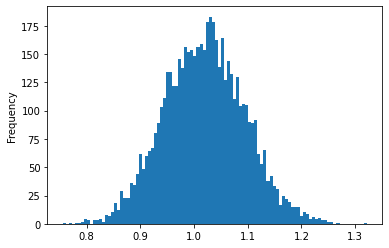

In [64]:
df_Brasil['RELACAO_FM'].plot.hist(bins=100);

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

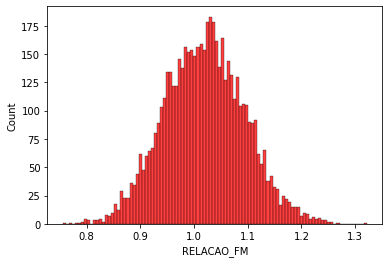

In [69]:
sns.histplot(df_Brasil['RELACAO_FM'], bins=100, color='red');

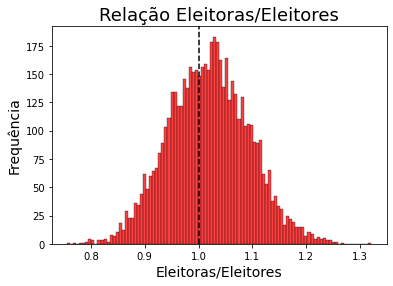

In [74]:
sns.histplot(df_Brasil['RELACAO_FM'], bins=100, color='red')
plt.title('Relação Eleitoras/Eleitores', fontsize=18)
plt.xlabel('Eleitoras/Eleitores', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.axvline(1, color='black', linestyle='--');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.9% of the points cannot be placed; y

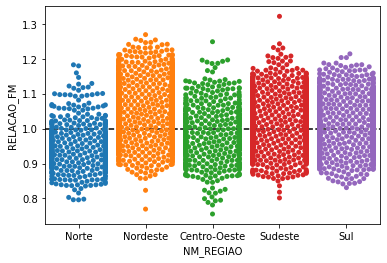

In [78]:
sns.swarmplot(data=df_Brasil, x='NM_REGIAO', y='RELACAO_FM')
plt.axhline(1, color='black', linestyle='--')

In [79]:
lista = ['QTD_ELEITORES_16', 'QTD_ELEITORES_17', 'QTD_ELEITORES_18',
         'QTD_ELEITORES_19', 'QTD_ELEITORES_20']

tot_idade = df[lista].sum()
tot_idade

QTD_ELEITORES_16     403683
QTD_ELEITORES_17     996934
QTD_ELEITORES_18    2326608
QTD_ELEITORES_19    2817706
QTD_ELEITORES_20    3034507
dtype: int64

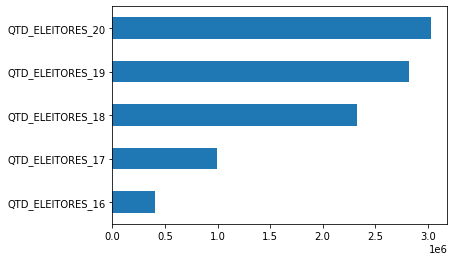

In [81]:
tot_idade.plot.barh();

# Mapa das escolas do RS por taxa de distorção de série

In [1]:
import pandas as pd
import folium

In [2]:
df = pd.read_csv('http://dados.fee.tche.br/ckan-download/fee-2013-mun-taxa-de-distorcao-idade-serie-total-102524.csv',
                 encoding='latin1',
                 skiprows=1)
df.head()

,Município,ibge,latitude,longitude,/Educação/Ens...de Série/Total 2013 (-)
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [3]:
df = df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)': 'tx_distorcao'})
df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Município     495 non-null    object 
 1   ibge          495 non-null    int64  
 2   latitude      495 non-null    float64
 3   longitude     495 non-null    float64
 4   tx_distorcao  495 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 19.5+ KB


In [5]:
df['tx_distorcao'] = df['tx_distorcao'].str.replace(',','.').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Município     495 non-null    object 
 1   ibge          495 non-null    int64  
 2   latitude      495 non-null    float64
 3   longitude     495 non-null    float64
 4   tx_distorcao  495 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.5+ KB


In [6]:
df.nsmallest(10, 'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
490,Vista Alegre do Prata,4323606,-28.8052,-51.7946,2.6
375,Santo Antônio do Palma,4317558,-28.4956,-52.0267,4.3
28,Áurea,4301552,-27.6936,-52.0505,5.8
268,Nicolau Vergueiro,4312674,-28.5298,-52.4676,7.0
128,Derrubadas,4306320,-27.2642,-53.8645,7.4
119,Cotiporã,4305959,-28.9891,-51.6971,7.5
68,Campestre da Serra,4303673,-28.7926,-51.0941,7.6
476,Vanini,4322558,-28.4758,-51.8447,7.8
236,Linha Nova,4311643,-29.4679,-51.2003,8.0
392,São José do Inhacorá,4318499,-27.7251,-54.1275,8.0


In [7]:
df.nlargest(10, 'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
307,Pedras Altas,4314175,-31.7217,-53.5838,56.0
316,Pinheiro Machado,4314506,-31.5794,-53.3798,53.9
17,Arambaré,4300851,-30.9093,-51.5046,52.8
140,Eldorado do Sul,4306767,-30.0847,-51.6187,51.9
35,Barra do Quaraí,4301875,-30.2029,-57.5497,51.5
393,São José do Norte,4318507,-32.0151,-52.0331,49.4
413,São Valério do Sul,4319737,-27.7906,-53.9368,49.2
193,Hulha Negra,4309654,-31.4067,-53.8667,49.0
106,Chuí,4305439,-33.6866,-53.4594,48.6
233,Lavras do Sul,4311502,-30.8071,-53.8931,47.7


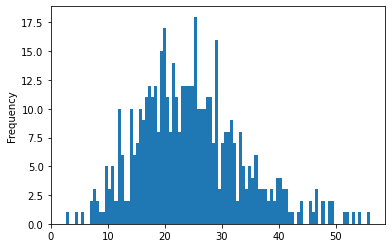

In [8]:
df['tx_distorcao'].plot.hist(bins=100);

In [9]:
df[df['tx_distorcao'] <= 10].count()

Município       17
ibge            17
latitude        17
longitude       17
tx_distorcao    17
dtype: int64

In [10]:
df[df['tx_distorcao'] >= 45].count()

Município       17
ibge            17
latitude        17
longitude       17
tx_distorcao    17
dtype: int64

In [11]:
brasil = folium.Map(location=[-13.6603615, -69.6775883],
                    zoom_start=4)

brasil

In [15]:
rs = folium.Map(location=[-30.3918717, -55.9134377],
                zoom_start=7)

rs

In [20]:
for indice, municipio in df[df['tx_distorcao'] <= 10].iterrows():
    folium.Marker(
        location=[municipio['latitude'], municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='green')
    ).add_to(rs)

rs

In [21]:
for indice, municipio in df[df['tx_distorcao'] >= 45].iterrows():
    folium.Marker(
        location=[municipio['latitude'], municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='red')
    ).add_to(rs)

rs

In [22]:
df[df['Município'] == 'Porto Alegre']['tx_distorcao']

325    32.3
Name: tx_distorcao, dtype: float64